In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from fancyimpute import KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
# Ruta de los archivos CSV
ruta_archivos = {
    "df_precio_hotelero": "larioja.org/Turismo/Precios turísticos/Índice de precios e indicadores de rentabilidad del sector hotelero de La Rioja/1-indice general y desglose por categorías y meses 20603001.csv",
    "df_adr_revpar": "larioja.org/Turismo/Precios turísticos/Índice de precios e indicadores de rentabilidad del sector hotelero de La Rioja/2-Adr y RevPar de puntos turísticos por categorías, municipio y meses 20603002.csv",
    "df_ipac": "larioja.org/Turismo/Precios turísticos/Índices de precios de establecimientos extrahoteleros de La Rioja/Consultas generales/1-Índice de precios de campings (IPAC) desglosado por meses.csv",
    "df_ipap": "larioja.org/Turismo/Precios turísticos/Índices de precios de establecimientos extrahoteleros de La Rioja/Consultas generales/2-Índice de precios de apartamentos (IPAP) desglosado por tarifa y meses.csv",
    "df_iptr": "larioja.org/Turismo/Precios turísticos/Índices de precios de establecimientos extrahoteleros de La Rioja/Consultas generales/3-Índice de precios de turismo rural (IPTR) desglosado por tarifa y meses.csv",
    "df_num_empresas": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Número de empresas del sector turístico/1-Número de empresas y locales en el sector turístico.csv",
    "df_afiliados_regimen": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Afiliados a la Seguridad Social del sector turístico/1-Afiliados a la seguridad social en el sector turístico por régimen.csv",
    "df_afiliados_contrato": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Afiliados a la Seguridad Social del sector turístico/2-Afiliados a la seguridad social en el sector turístico por tipo de contrato.csv",
    "df_magnitudes_2015": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Principales macromagnitudes económicas del sector turístico (año 2015 y siguientes)/1-Principales magnitudes en el sector turístico.csv",
    "df_indicadores_2015": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Principales macromagnitudes económicas del sector turístico (año 2015 y siguientes)/2-Principales indicadores en el sector turístico.csv",
    "df_personal_2015": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Principales macromagnitudes económicas del sector turístico (año 2015 y siguientes)/3-Personal ocupado en el sector turístico.csv",
    "df_magnitudes_2008_2014": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Principales macromagnitudes económicas del sector turístico (serie 2008 - 2014)/1-Principales magnitudes en el sector turístico.csv",
    "df_indicadores_2008_2014": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Principales macromagnitudes económicas del sector turístico (serie 2008 - 2014)/2-Principales indicadores en el sector turístico.csv",
    "df_personal_2008_2014": "larioja.org/Turismo/Indicadores económicos del sector turístico en La Rioja/Indicadores del sector turístico en La Rioja/Principales macromagnitudes económicas del sector turístico (serie 2008 - 2014)/3-Personal ocupado en el sector turístico.csv",
    "df_establecimientos_turisticos": "larioja.org/Turismo/Directorio de establecimientos turísticos/Directorio de alojamientos turísticos y plazas/Servicios de alojamiento/1-Establecimientos turísticos y capacidad por municipios y tipo de establecimiento.csv",
    "df_hoteles_capacidad": "larioja.org/Turismo/Directorio de establecimientos turísticos/Directorio de alojamientos turísticos y plazas/Servicios de alojamiento/2-Número de hoteles y capacidad por municipios y categoría.csv",
    "df_apartamentos_capacidad": "larioja.org/Turismo/Directorio de establecimientos turísticos/Directorio de alojamientos turísticos y plazas/Servicios de alojamiento/5-Número de apartamentos y capacidad por municipios y categoría.csv",
    "df_viviendas_uso_turistico": "larioja.org/Turismo/Directorio de establecimientos turísticos/Directorio de alojamientos turísticos y plazas/Servicios de alojamiento/6-Número de viviendas de uso turístico por municipios.csv",
    "df_campings_capacidad": "larioja.org/Turismo/Directorio de establecimientos turísticos/Directorio de alojamientos turísticos y plazas/Servicios de alojamiento/7-Número de campings y capacidad por municipios y categoría.csv",
    "df_casas_rurales_capacidad": "larioja.org/Turismo/Directorio de establecimientos turísticos/Directorio de alojamientos turísticos y plazas/Servicios de alojamiento/8-Número de casas rurales y capacidad por municipios y categoría.csv",
    "df_plazas_por_habitante": "larioja.org/Turismo/Directorio de establecimientos turísticos/Directorio de alojamientos turísticos y plazas/Servicios de alojamiento/10-Número de plazas de alojamiento por cada mil habitantes por municipios.csv",
    "df_gasto_via_acceso": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/1-Gasto de los turistas internacionales según via de acceso principal.csv",
    "df_gasto_alojamiento": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/2-Gasto de los turistas internacionales según alojamiento principal.csv",
    "df_gasto_motivo_viaje": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/3-Gasto de los turistas internacionales según motivo principal del viaje.csv",
    "df_gasto_pais_residencia": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/4-Gasto de los turistas internacionales según país de residencia.csv",
    "df_gasto_organizacion_viaje": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/5-Gasto de los turistas internacionales según forma organización del viaje.csv",
    "df_gasto_duracion_viaje": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/6-Gasto de los turistas internacionales según duración del viaje.csv",
    "df_gasto_partidas": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/7-Gasto de los turistas internacionales según partidas de gasto.csv",
    "df_turistas_via_acceso": "larioja.org/Turismo/Encuestas turísticas/Estadística de Movimientos Turísticos en Fronteras para La Rioja/1-Número de turistas según via de acceso principal.csv",
    "df_turistas_alojamiento": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/2-Gasto de los turistas internacionales según alojamiento principal.csv",
    "df_turistas_motivo_viaje": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/3-Gasto de los turistas internacionales según motivo principal del viaje.csv",
    "df_turistas_pais_residencia": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/4-Gasto de los turistas internacionales según país de residencia.csv",
    "df_turistas_organizacion_viaje": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/5-Gasto de los turistas internacionales según forma organización del viaje.csv",
    "df_turistas_duracion_viaje": "larioja.org/Turismo/Encuestas turísticas/Encuesta de Gasto Turístico en La Rioja/6-Gasto de los turistas internacionales según duración del viaje.csv"
}

# Cargar dataframes
dataframes = {}
for nombre, ruta in ruta_archivos.items():
    dataframes[nombre] = pd.read_csv(ruta)
    print(f"{nombre} cargado con éxito.")

# Mostrar el análisis descriptivo y el tratamiento de valores nulos
def analizar_dataframe(df, nombre):
    print(f"Análisis Descriptivo de {nombre}")
    print(df.describe(include='all'))
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nNúmero de valores nulos por columna:")
    print(df.isnull().sum())
    print("\n")

for nombre, df in dataframes.items():
    analizar_dataframe(df, nombre)


df_precio_hotelero cargado con éxito.
df_adr_revpar cargado con éxito.
df_ipac cargado con éxito.
df_ipap cargado con éxito.
df_iptr cargado con éxito.
df_num_empresas cargado con éxito.
df_afiliados_regimen cargado con éxito.
df_afiliados_contrato cargado con éxito.
df_magnitudes_2015 cargado con éxito.
df_indicadores_2015 cargado con éxito.
df_personal_2015 cargado con éxito.
df_magnitudes_2008_2014 cargado con éxito.
df_indicadores_2008_2014 cargado con éxito.
df_personal_2008_2014 cargado con éxito.
df_establecimientos_turisticos cargado con éxito.
df_hoteles_capacidad cargado con éxito.
df_apartamentos_capacidad cargado con éxito.
df_viviendas_uso_turistico cargado con éxito.
df_campings_capacidad cargado con éxito.
df_casas_rurales_capacidad cargado con éxito.
df_plazas_por_habitante cargado con éxito.
df_gasto_via_acceso cargado con éxito.
df_gasto_alojamiento cargado con éxito.
df_gasto_motivo_viaje cargado con éxito.
df_gasto_pais_residencia cargado con éxito.
df_gasto_organiz

### Tratamiento de los valores nulos:

In [47]:
dataframes_mas_5_nulos = [
    "df_establecimientos_turisticos", "df_hoteles_capacidad", "df_apartamentos_capacidad", 
    "df_campings_capacidad", "df_casas_rurales_capacidad"
]

In [48]:
# Paso 1: Eliminar filas con valores nulos en dataframes con menos del 5% de nulos
dataframes_menos_5_nulos = [
    "df_precio_hotelero", "df_ipap", "df_num_empresas", "df_afiliados_regimen", "df_gasto_organizacion_viaje"
]

for nombre in dataframes_menos_5_nulos:
    dataframes[nombre].dropna(subset=['DATA'], inplace=True)
    print(f"Filas con valores nulos en 'DATA' eliminadas en {nombre}")


Filas con valores nulos en 'DATA' eliminadas en df_precio_hotelero
Filas con valores nulos en 'DATA' eliminadas en df_ipap
Filas con valores nulos en 'DATA' eliminadas en df_num_empresas
Filas con valores nulos en 'DATA' eliminadas en df_afiliados_regimen
Filas con valores nulos en 'DATA' eliminadas en df_gasto_organizacion_viaje


In [49]:
# Dataframes con más del 5% de valores nulos
dataframes_mas_5_nulos = [
    "df_establecimientos_turisticos", "df_hoteles_capacidad", "df_apartamentos_capacidad", 
    "df_campings_capacidad", "df_casas_rurales_capacidad"
]

# Imputar los valores nulos usando la mediana
for nombre in dataframes_mas_5_nulos:
    df = dataframes[nombre]
    for column in df.select_dtypes(include=[float, int]).columns:
        df[column].fillna(df[column].median(), inplace=True)
    dataframes[nombre] = df
    print(f"Valores nulos imputados con la mediana en {nombre}")

# Verificar si quedan valores nulos
for nombre in dataframes_mas_5_nulos:
    df = dataframes[nombre]
    print(f"Valores nulos restantes en {nombre}:")
    print(df.isnull().sum())
    print("\n")

Valores nulos imputados con la mediana en df_establecimientos_turisticos
Valores nulos imputados con la mediana en df_hoteles_capacidad
Valores nulos imputados con la mediana en df_apartamentos_capacidad
Valores nulos imputados con la mediana en df_campings_capacidad
Valores nulos imputados con la mediana en df_casas_rurales_capacidad
Valores nulos restantes en df_establecimientos_turisticos:
Municipio                  0
Tipo de establecimiento    0
Indicador                  0
Periodo                    0
DATA                       0
dtype: int64


Valores nulos restantes en df_hoteles_capacidad:
Municipio              0
Categoría turística    0
Indicador              0
Periodo                0
DATA                   0
dtype: int64


Valores nulos restantes en df_apartamentos_capacidad:
Municipio              0
Categoría turística    0
Indicador              0
Periodo                0
DATA                   0
dtype: int64


Valores nulos restantes en df_campings_capacidad:
Municipio  

In [50]:
# Mostrar estadísticas descriptivas para los dataframes después de la imputación
for nombre in dataframes_mas_5_nulos:
    df = dataframes[nombre]
    print(f"Análisis Descriptivo Post-Imputación de {nombre}")
    print(df.describe())
    print("\n")

# Mostrar estadísticas descriptivas para los dataframes sin más del 5% de valores nulos
dataframes_menos_5_nulos = [
    "df_precio_hotelero", "df_ipap", "df_num_empresas", "df_afiliados_regimen", "df_gasto_organizacion_viaje"
]

for nombre in dataframes_menos_5_nulos:
    df = dataframes[nombre]
    print(f"Análisis Descriptivo Post-Imputación de {nombre}")
    print(df.describe())
    print("\n")


Análisis Descriptivo Post-Imputación de df_establecimientos_turisticos
            Periodo          DATA
count  67200.000000  67200.000000
mean    2016.500000     16.555804
std        4.609807    159.683542
min     2009.000000      1.000000
25%     2012.750000      7.000000
50%     2016.500000      7.000000
75%     2020.250000      7.000000
max     2024.000000   8087.000000


Análisis Descriptivo Post-Imputación de df_hoteles_capacidad
            Periodo          DATA
count  50400.000000  50400.000000
mean    2016.500000     24.228413
std        4.609818    126.377390
min     2009.000000      1.000000
25%     2012.750000     16.000000
50%     2016.500000     16.000000
75%     2020.250000     16.000000
max     2024.000000   5179.000000


Análisis Descriptivo Post-Imputación de df_apartamentos_capacidad
            Periodo          DATA
count  33600.000000  33600.000000
mean    2016.500000      6.860119
std        4.609841     42.867972
min     2009.000000      1.000000
25%     2012.750

Histograma de Periodo en df_establecimientos_turisticos


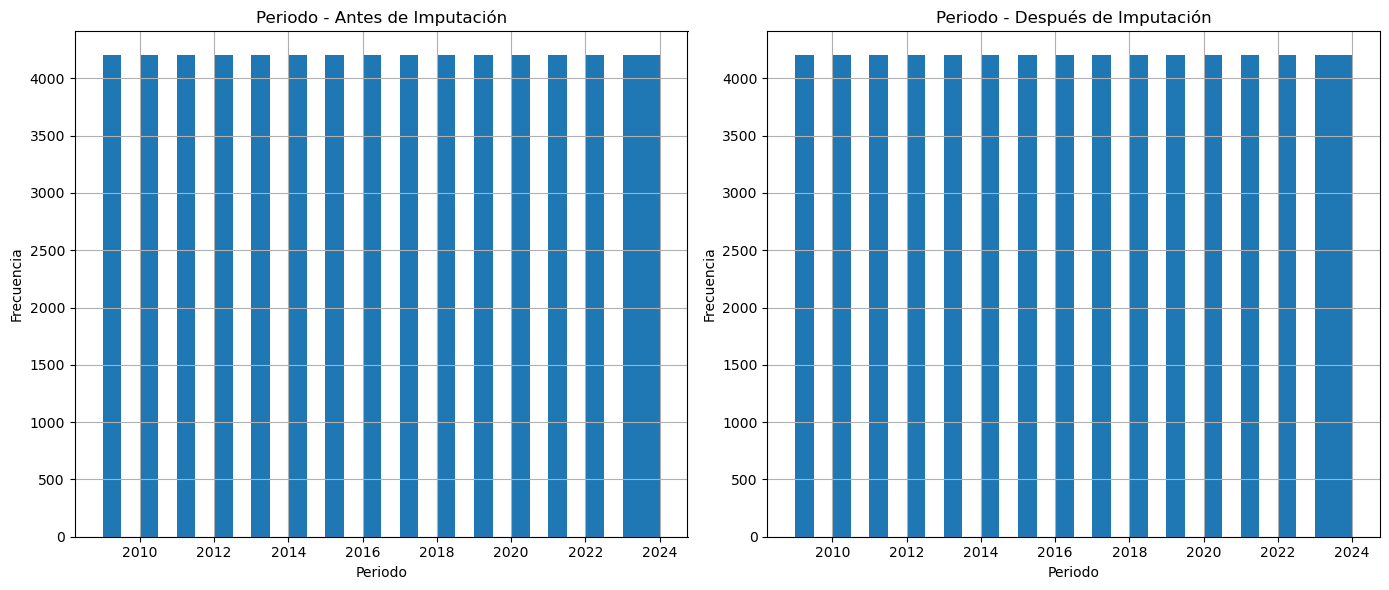

Histograma de DATA en df_establecimientos_turisticos


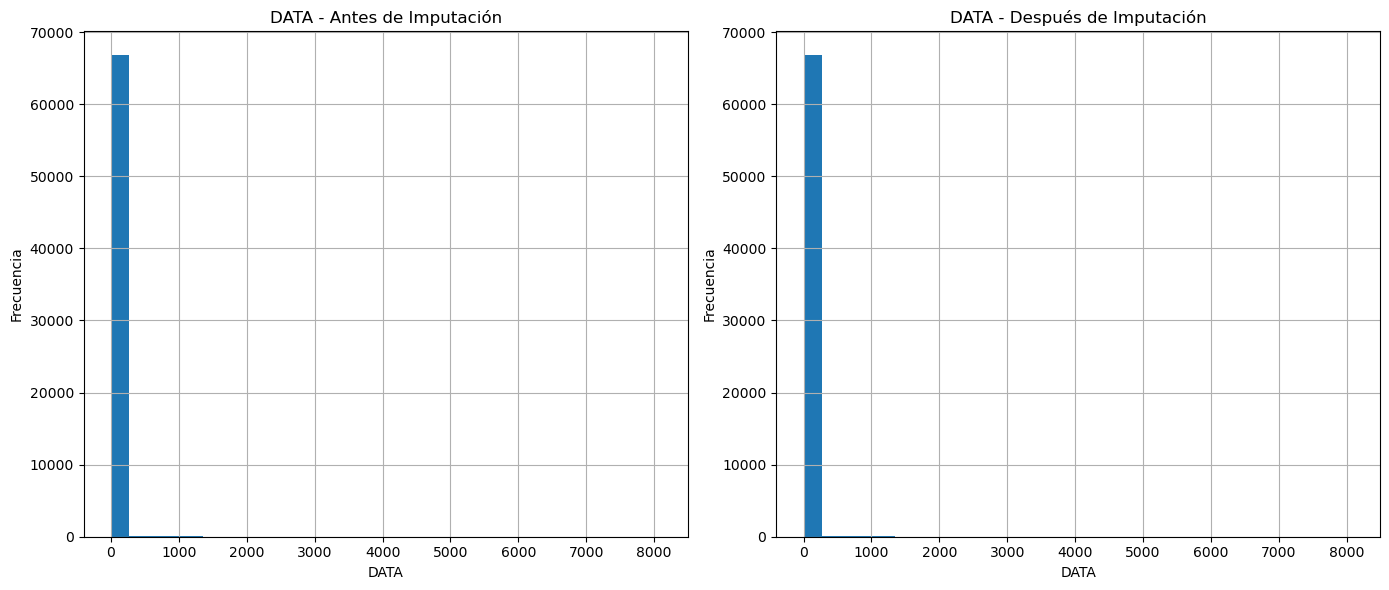

Histograma de Periodo en df_hoteles_capacidad


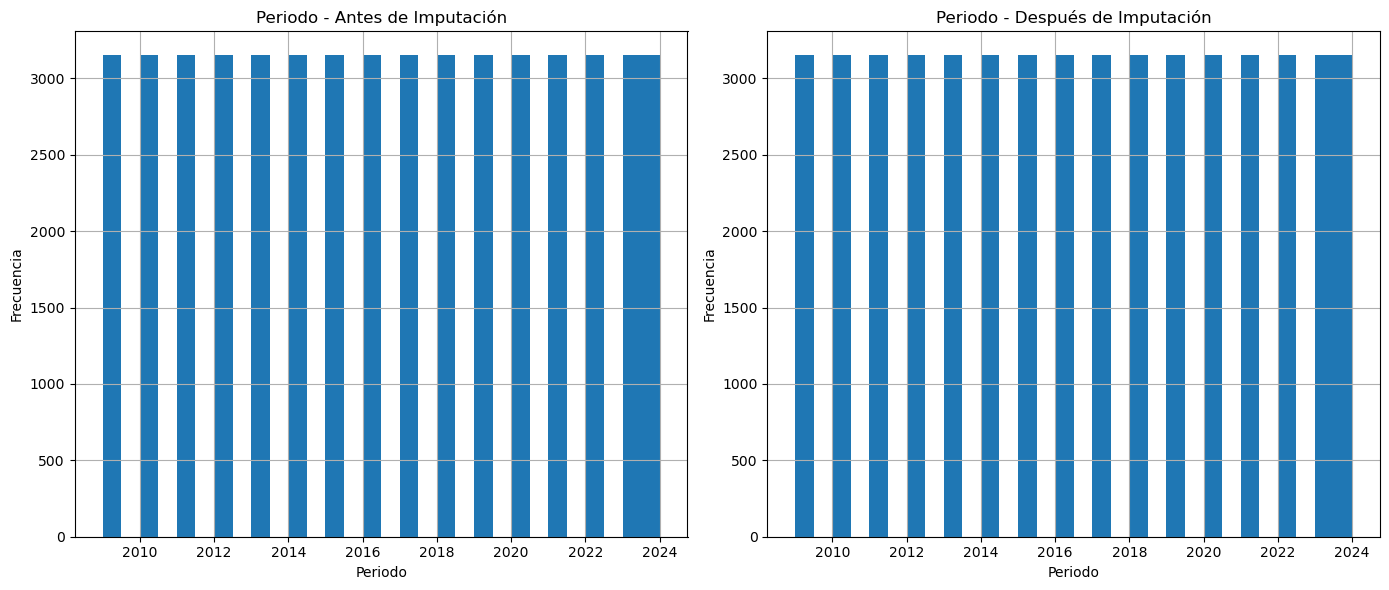

Histograma de DATA en df_hoteles_capacidad


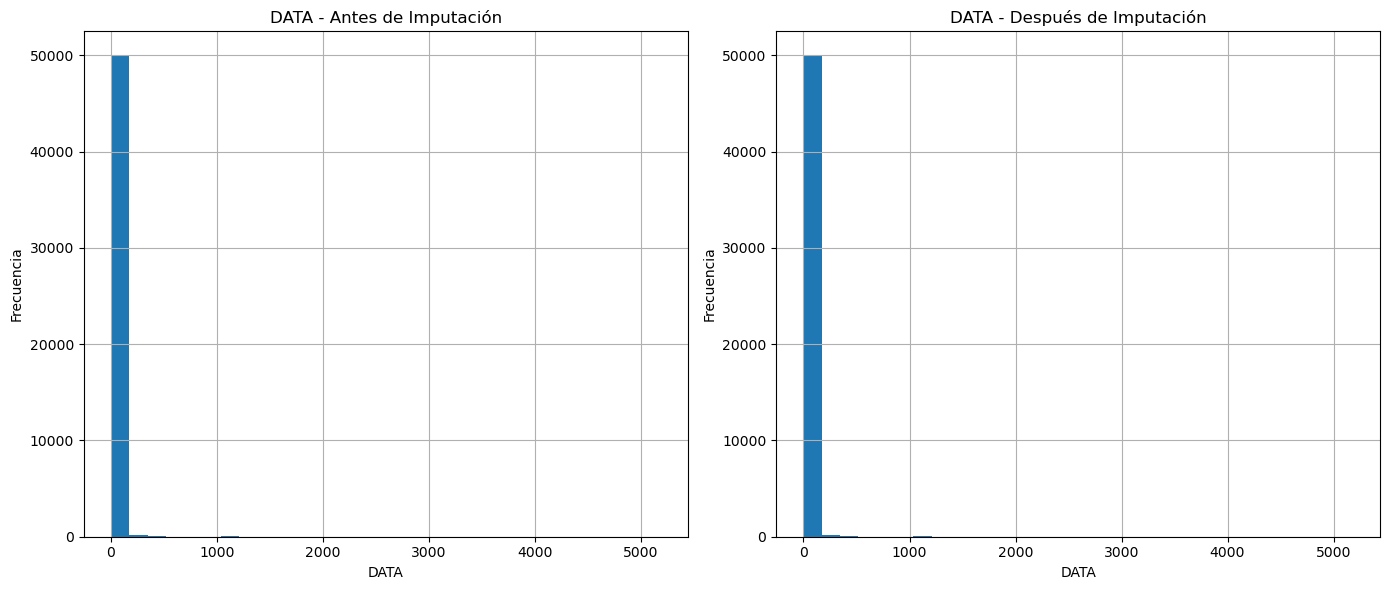

Histograma de Periodo en df_apartamentos_capacidad


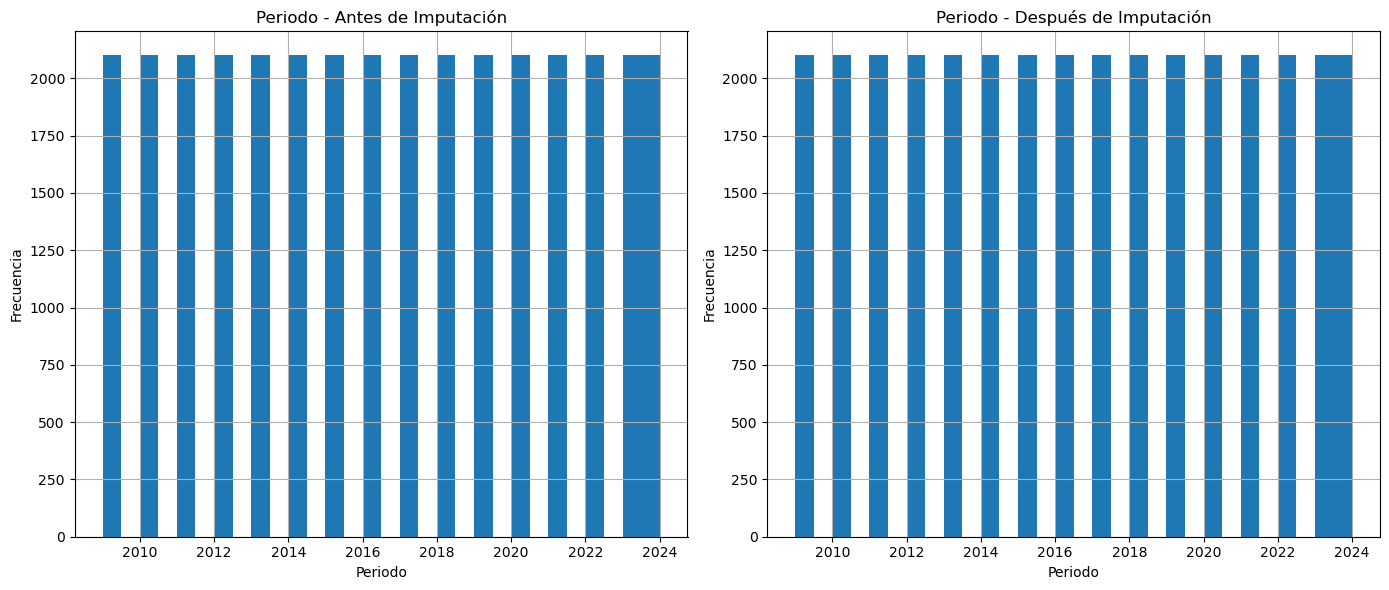

Histograma de DATA en df_apartamentos_capacidad


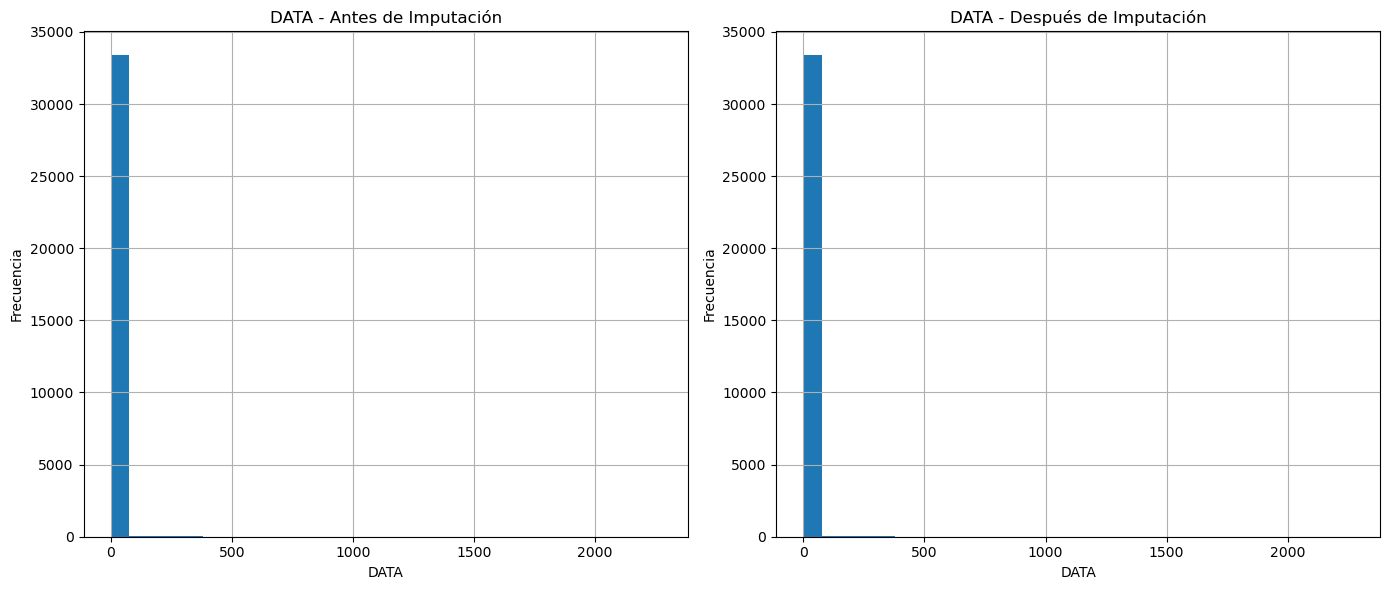

Histograma de Periodo en df_campings_capacidad


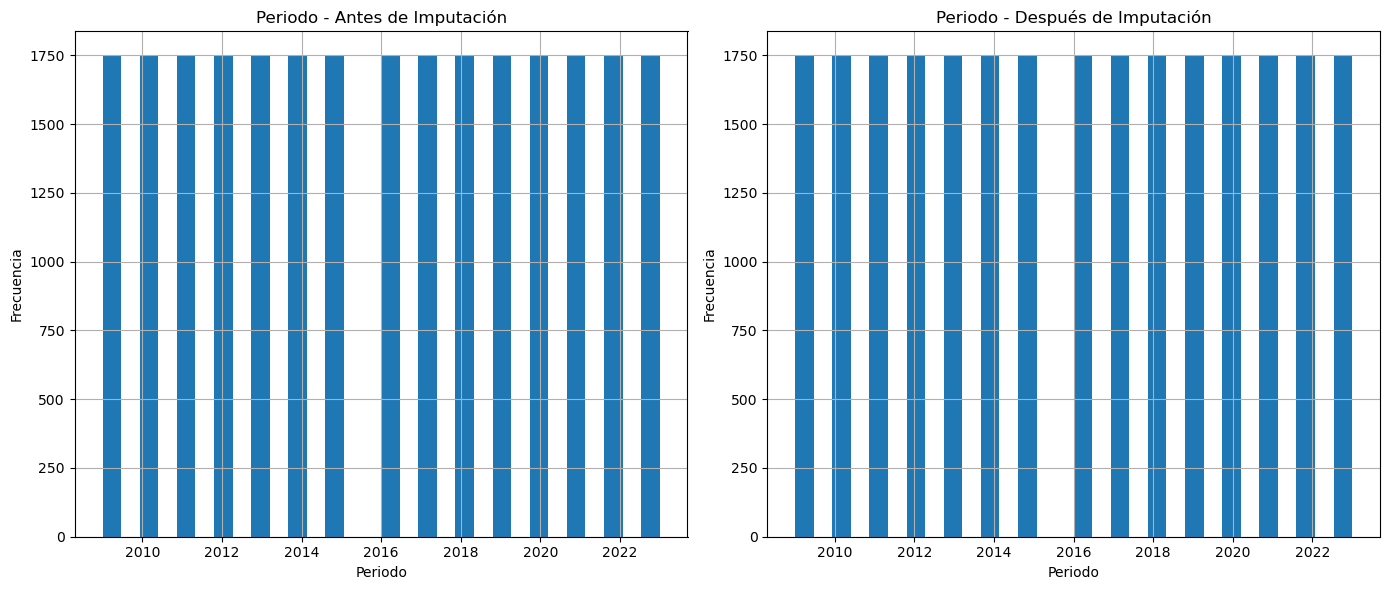

Histograma de DATA en df_campings_capacidad


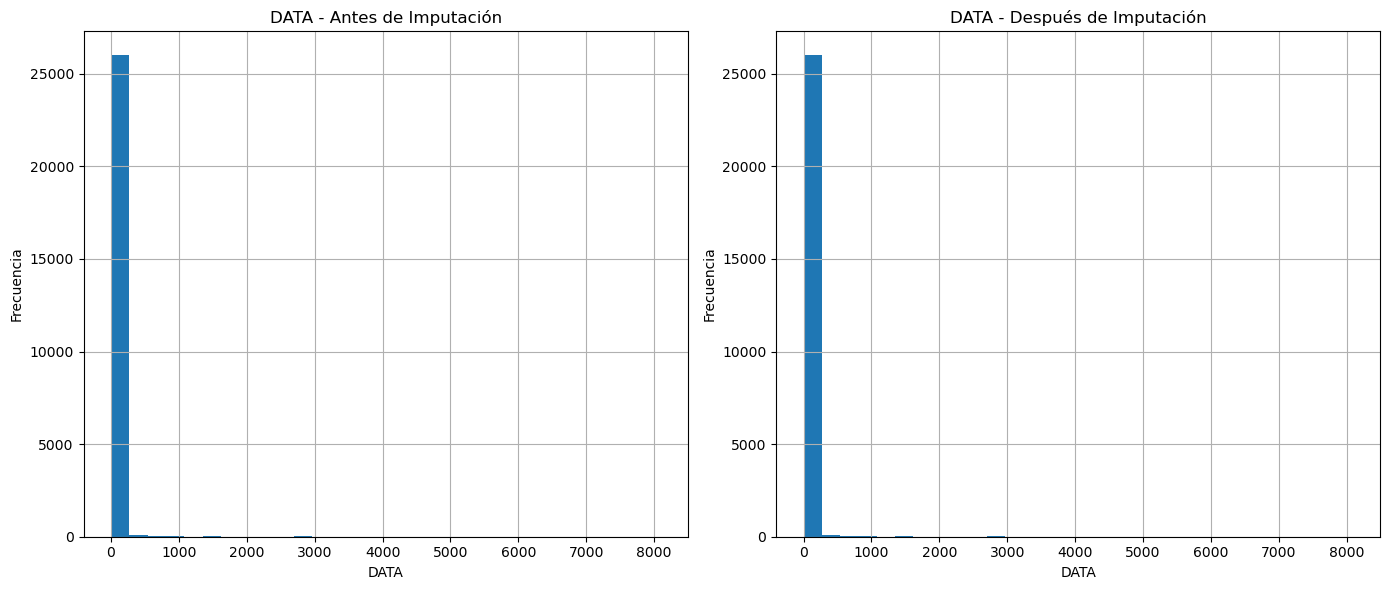

Histograma de Periodo en df_casas_rurales_capacidad


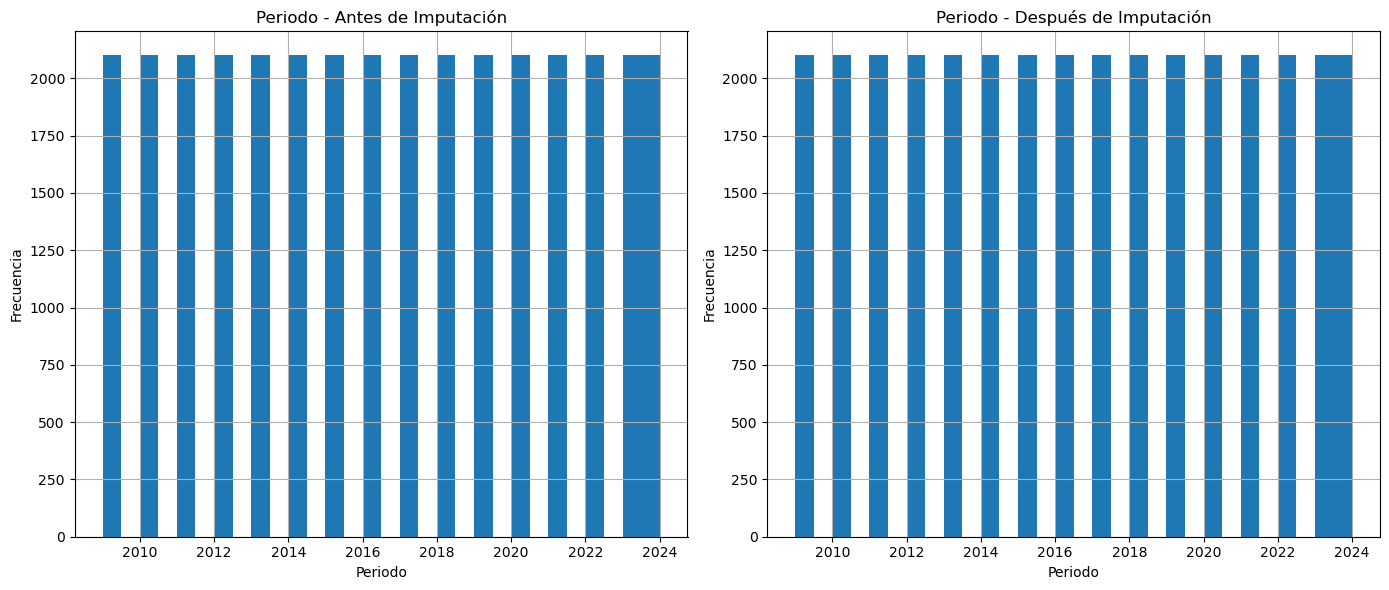

Histograma de DATA en df_casas_rurales_capacidad


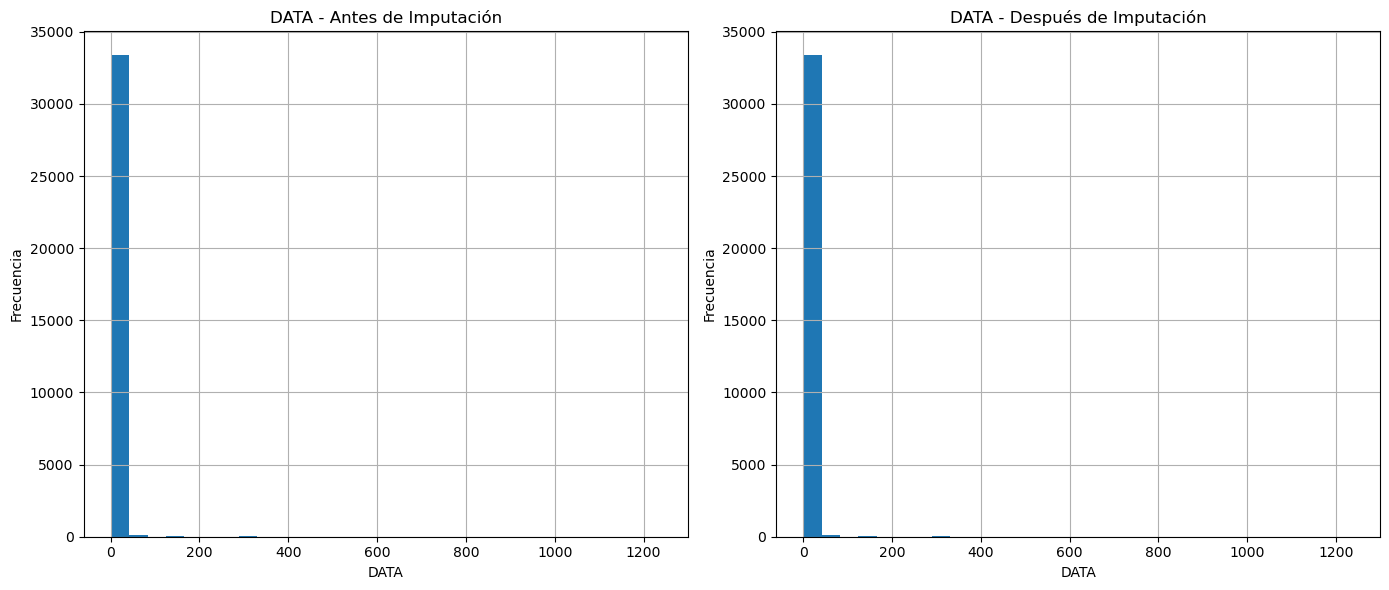

Histograma de DATA en df_precio_hotelero


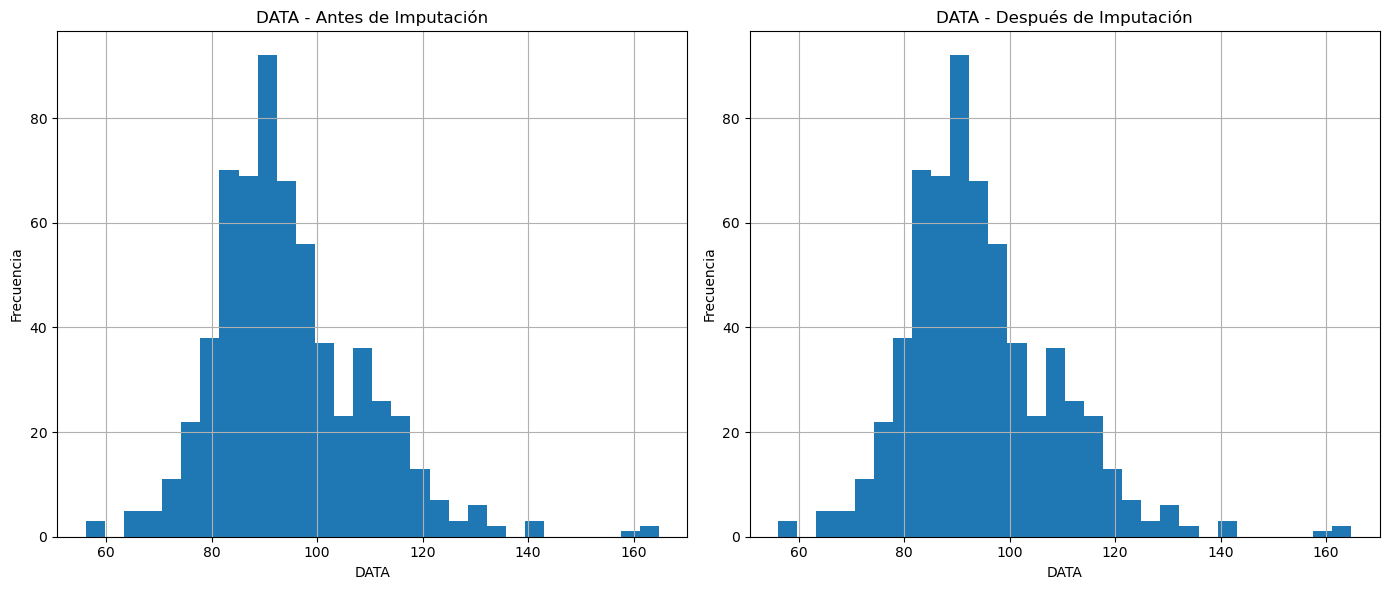

Histograma de DATA en df_ipap


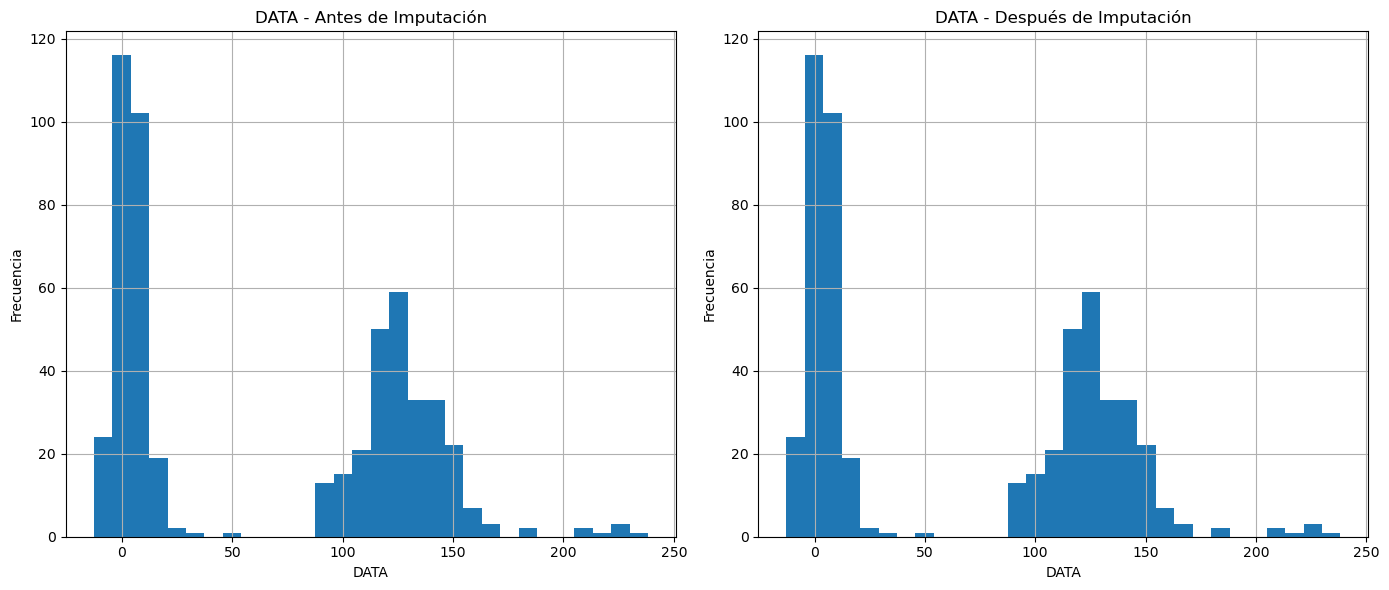

Histograma de Periodo en df_num_empresas


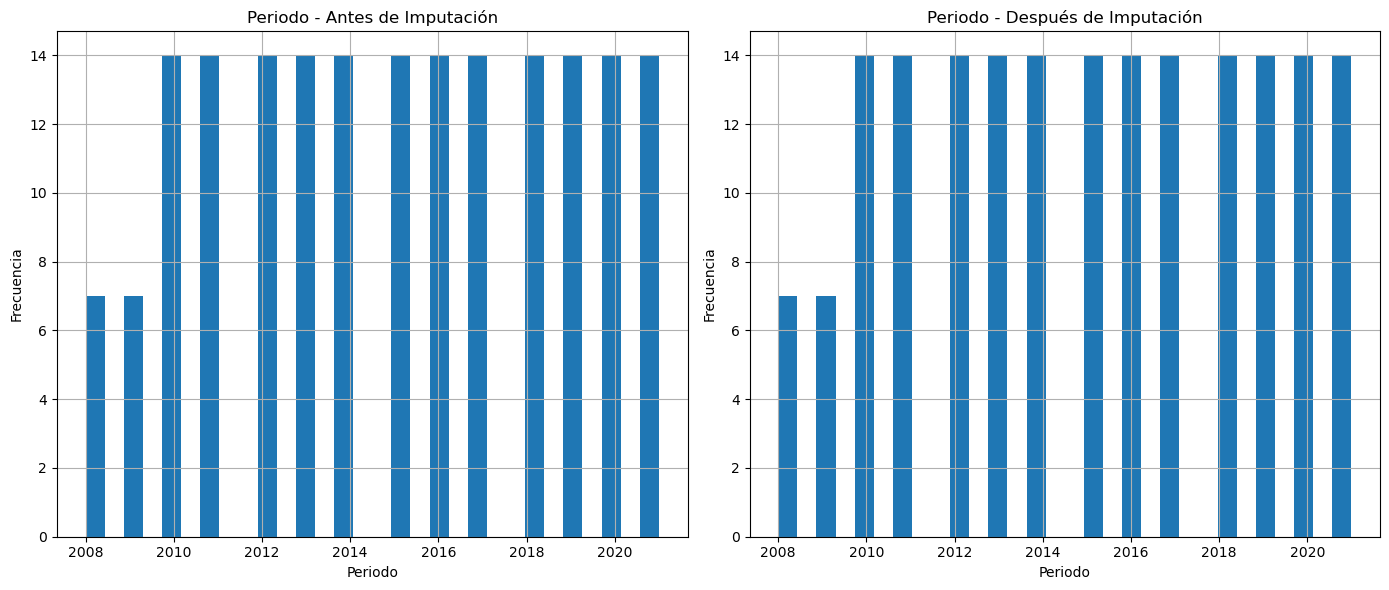

Histograma de DATA en df_num_empresas


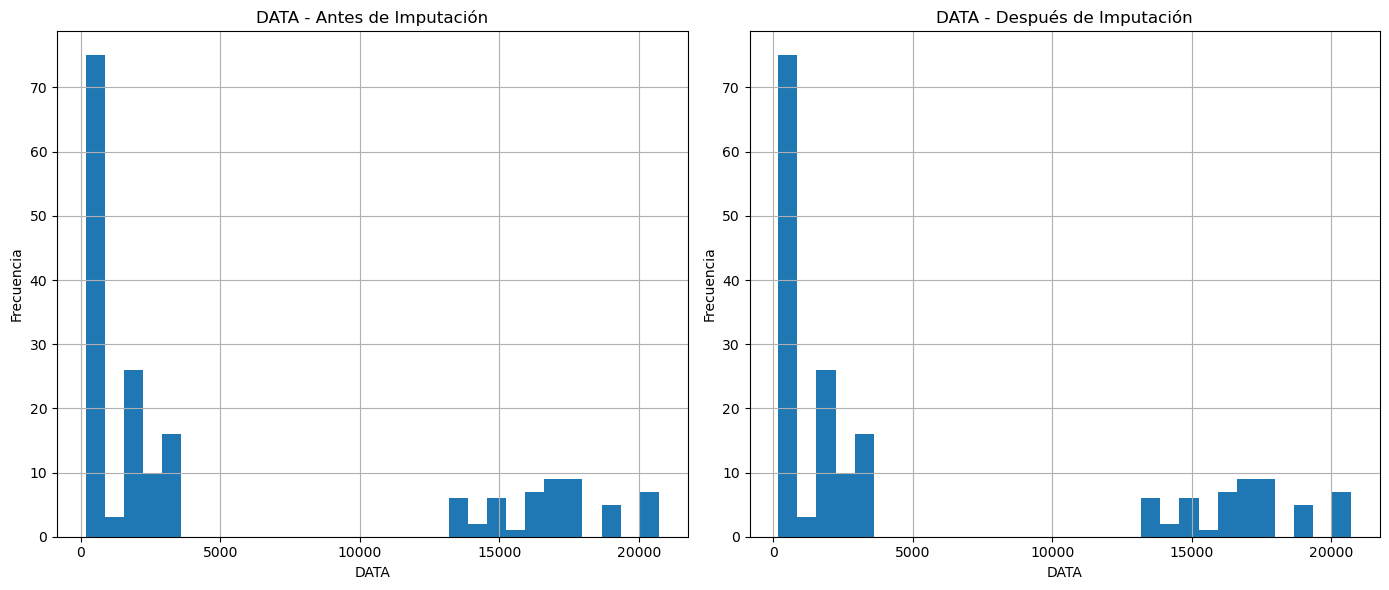

Histograma de DATA en df_afiliados_regimen


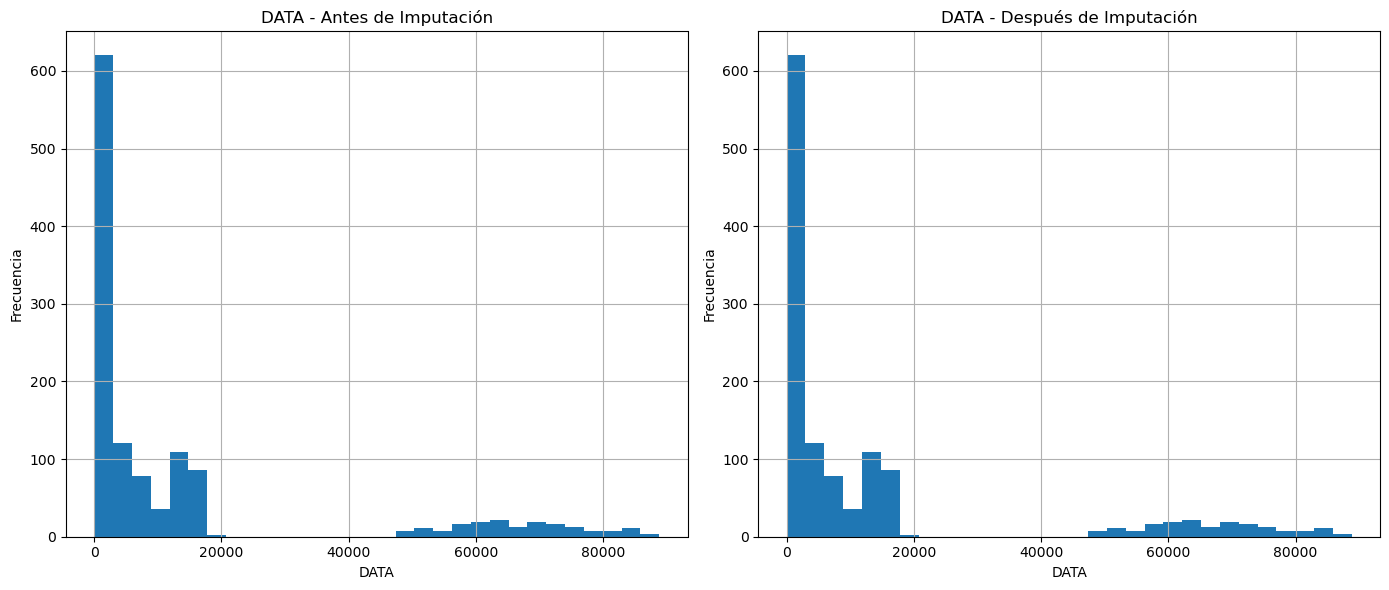

Histograma de Periodo en df_gasto_organizacion_viaje


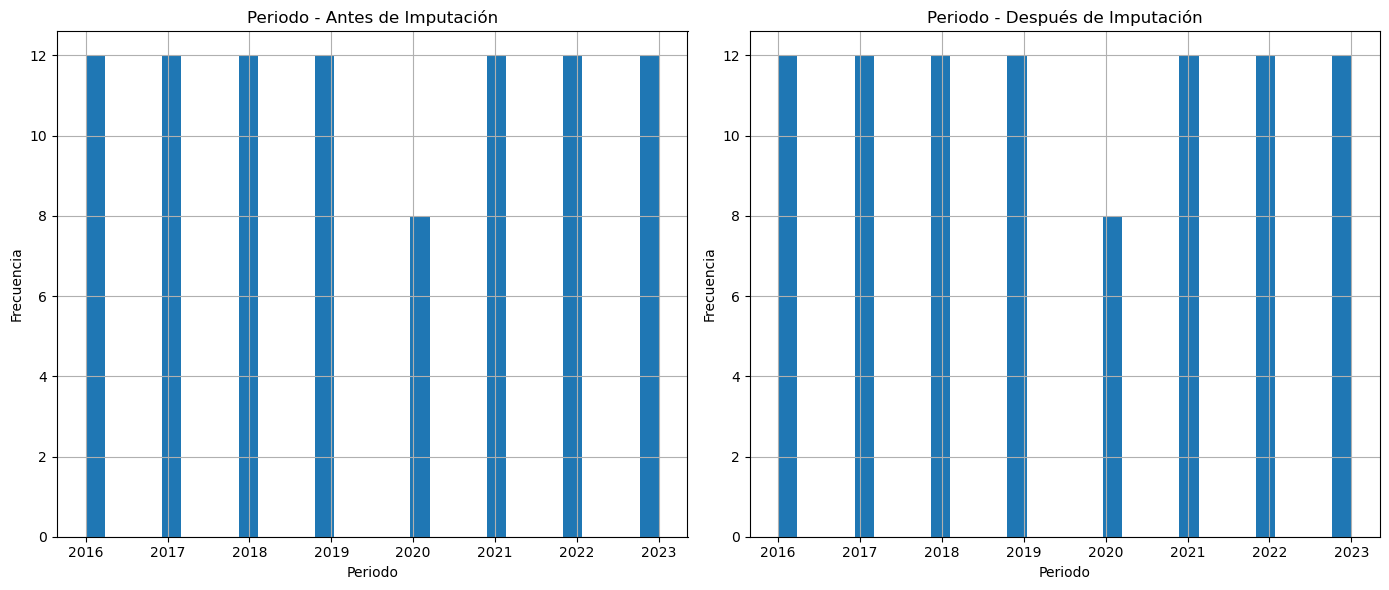

Histograma de DATA en df_gasto_organizacion_viaje


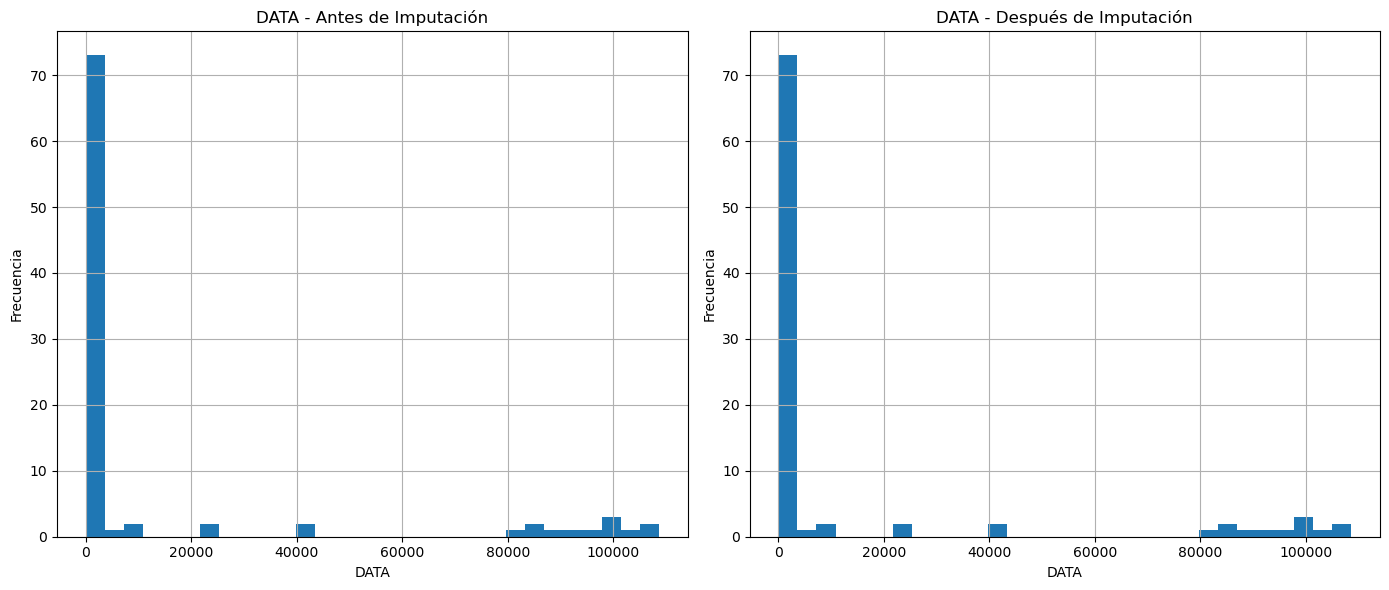

In [51]:


# Lista de dataframes a analizar
dataframes_a_analizar = dataframes_mas_5_nulos + dataframes_menos_5_nulos

# Función para plotear histogramas antes y después de la imputación
def plot_histograms(df, nombre_columna):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    df[nombre_columna].hist(bins=30)
    plt.title(f'{nombre_columna} - Antes de Imputación')
    plt.xlabel(nombre_columna)
    plt.ylabel('Frecuencia')
    
    plt.subplot(1, 2, 2)
    df[nombre_columna].hist(bins=30)
    plt.title(f'{nombre_columna} - Después de Imputación')
    plt.xlabel(nombre_columna)
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

# Ploteo de histogramas para cada dataframe
for nombre in dataframes_a_analizar:
    df = dataframes[nombre]
    columnas_numericas = df.select_dtypes(include=[float, int]).columns
    for col in columnas_numericas:
        print(f"Histograma de {col} en {nombre}")
        plot_histograms(df, col)


In [52]:
# Combina los dataframes en un solo dataframe solo con columnas numéricas
combined_df = pd.DataFrame()

for name, df in dataframes.items():
    numeric_df = df.select_dtypes(include=[float, int]).add_prefix(f"{name}_")  # Añadir prefijo para evitar colisiones de columnas
    combined_df = pd.concat([combined_df, numeric_df], axis=1)

# Verificar si hay columnas combinadas
print(combined_df.head())


   df_precio_hotelero_DATA  df_adr_revpar_DATA  df_ipac_DATA  df_ipap_DATA  \
0                    85.32               56.87        217.98        123.81   
1                    90.27               77.26          1.64          7.71   
2                    81.61               51.87        207.84           NaN   
3                    96.86               42.25         -1.40           NaN   
4                    66.79               47.06        143.65           NaN   

   df_iptr_DATA  df_num_empresas_Periodo  df_num_empresas_DATA  \
0        150.89                   2008.0               16501.0   
1          2.06                   2009.0               16522.0   
2        147.67                   2010.0               16666.0   
3          3.17                   2011.0               16614.0   
4        150.13                   2012.0               16508.0   

   df_afiliados_regimen_DATA  df_afiliados_contrato_DATA  \
0                    74739.0                     74739.0   
1             

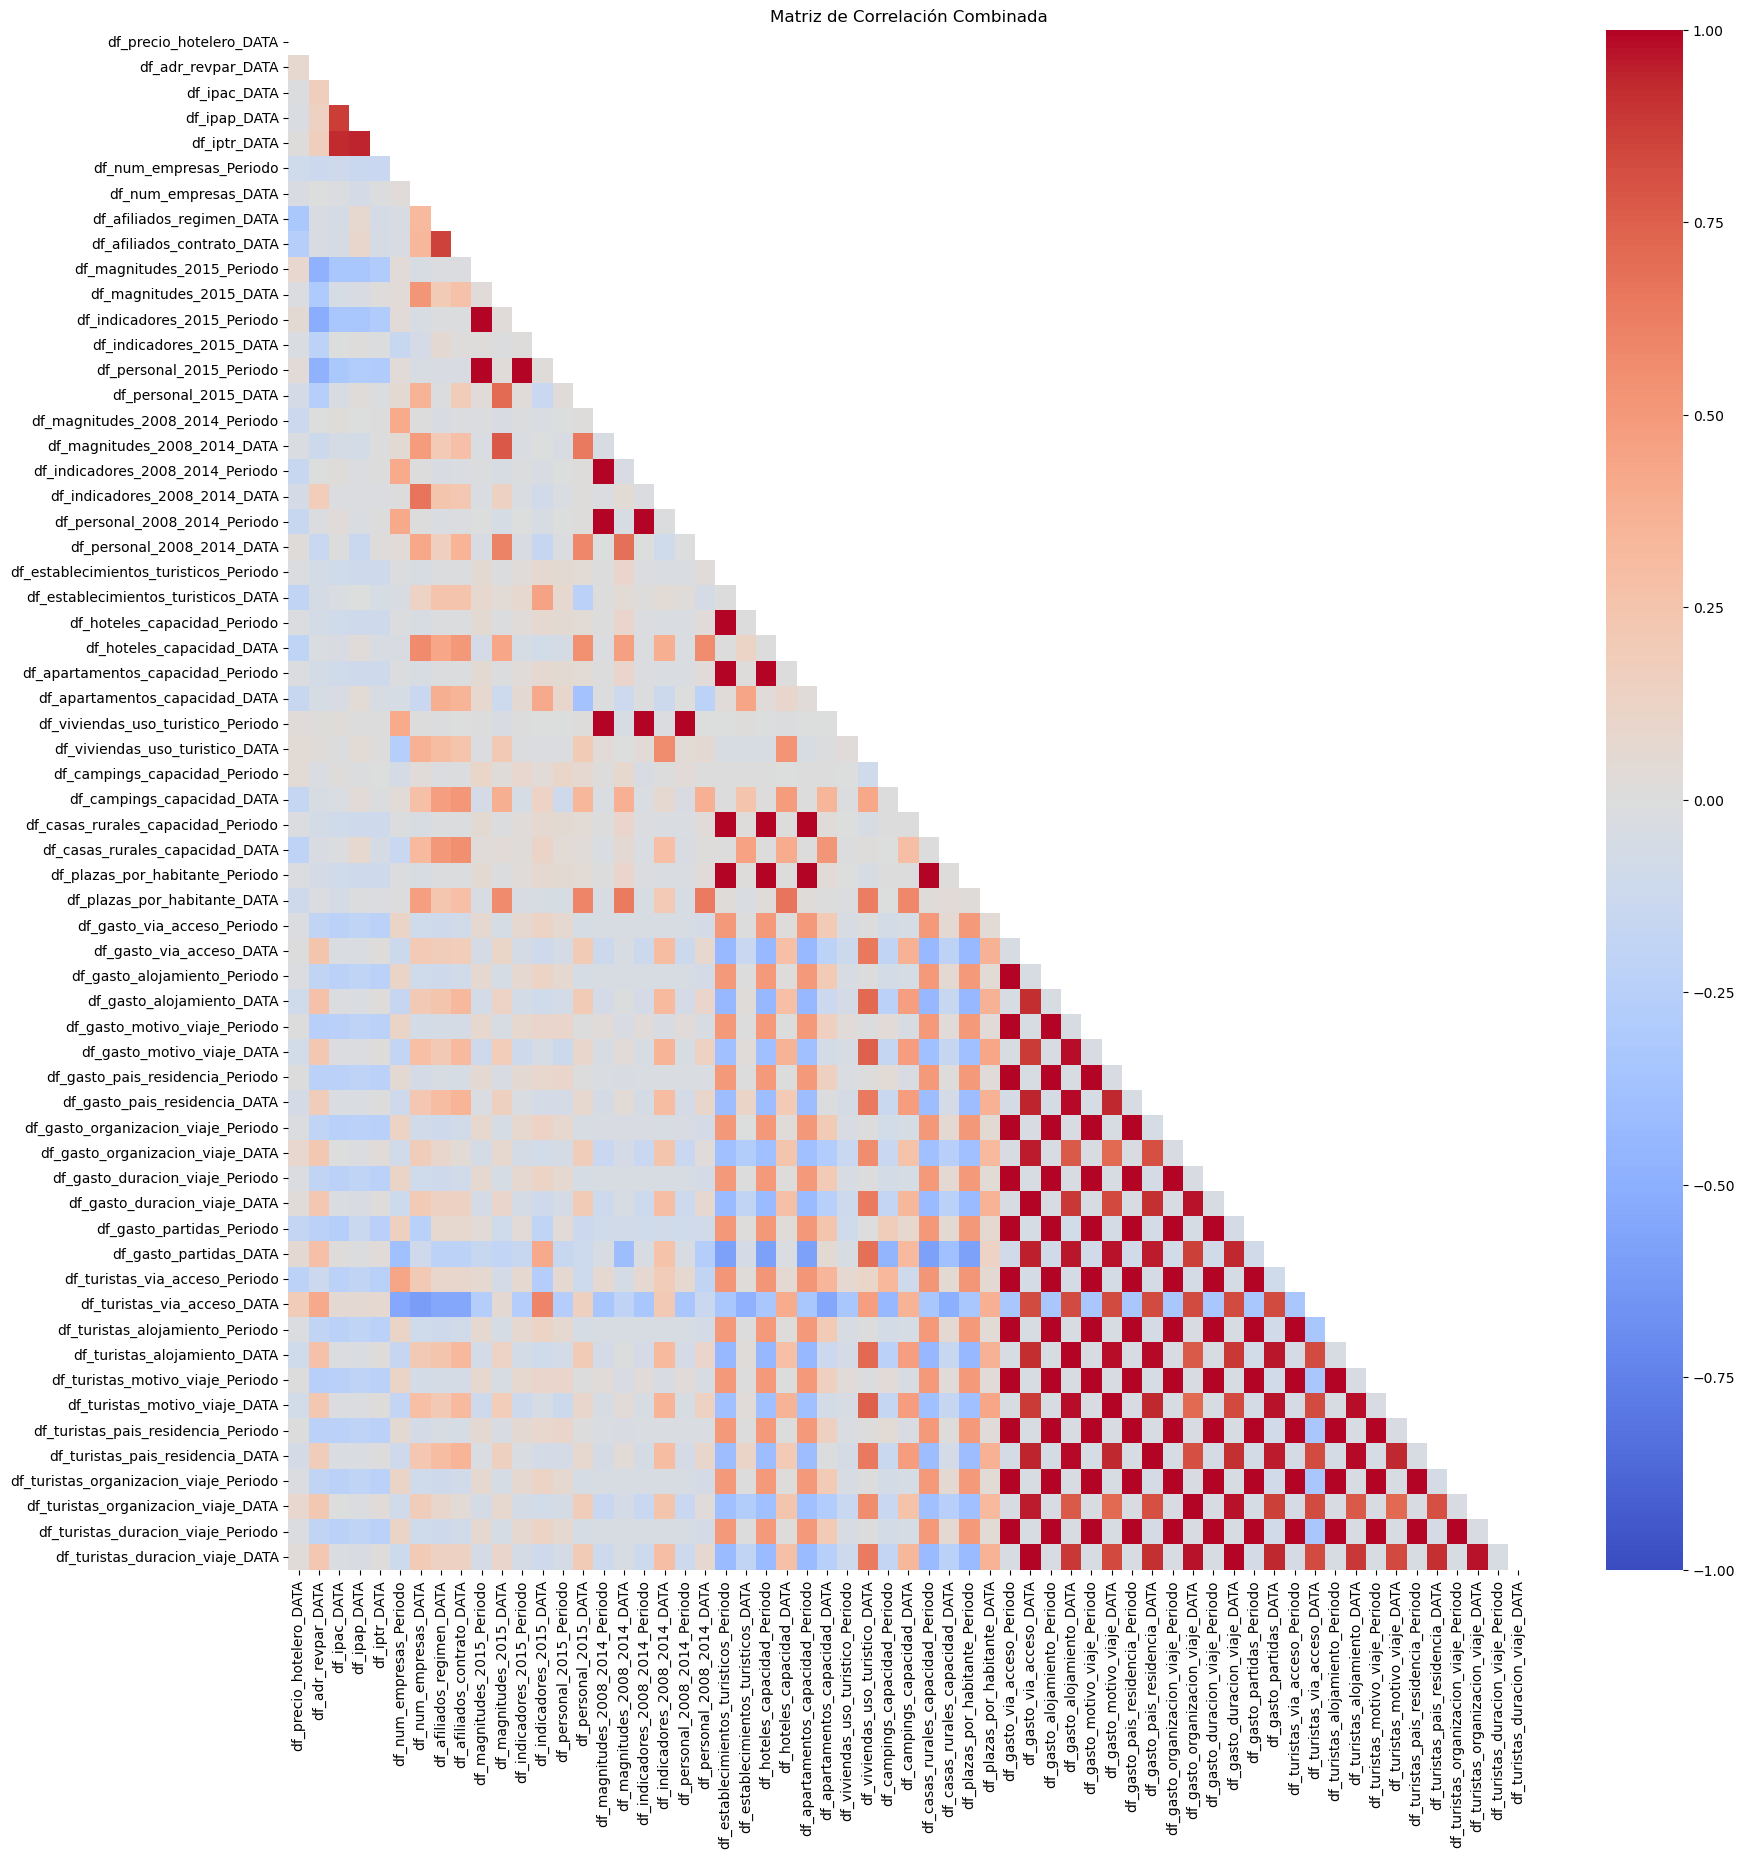

In [53]:
# Calcula la matriz de correlación
correlation_matrix = combined_df.corr()

# Genera una máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Genera el heatmap de la matriz de correlación con la máscara
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación Combinada')
plt.show()


/Users/patriciagonzalez/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


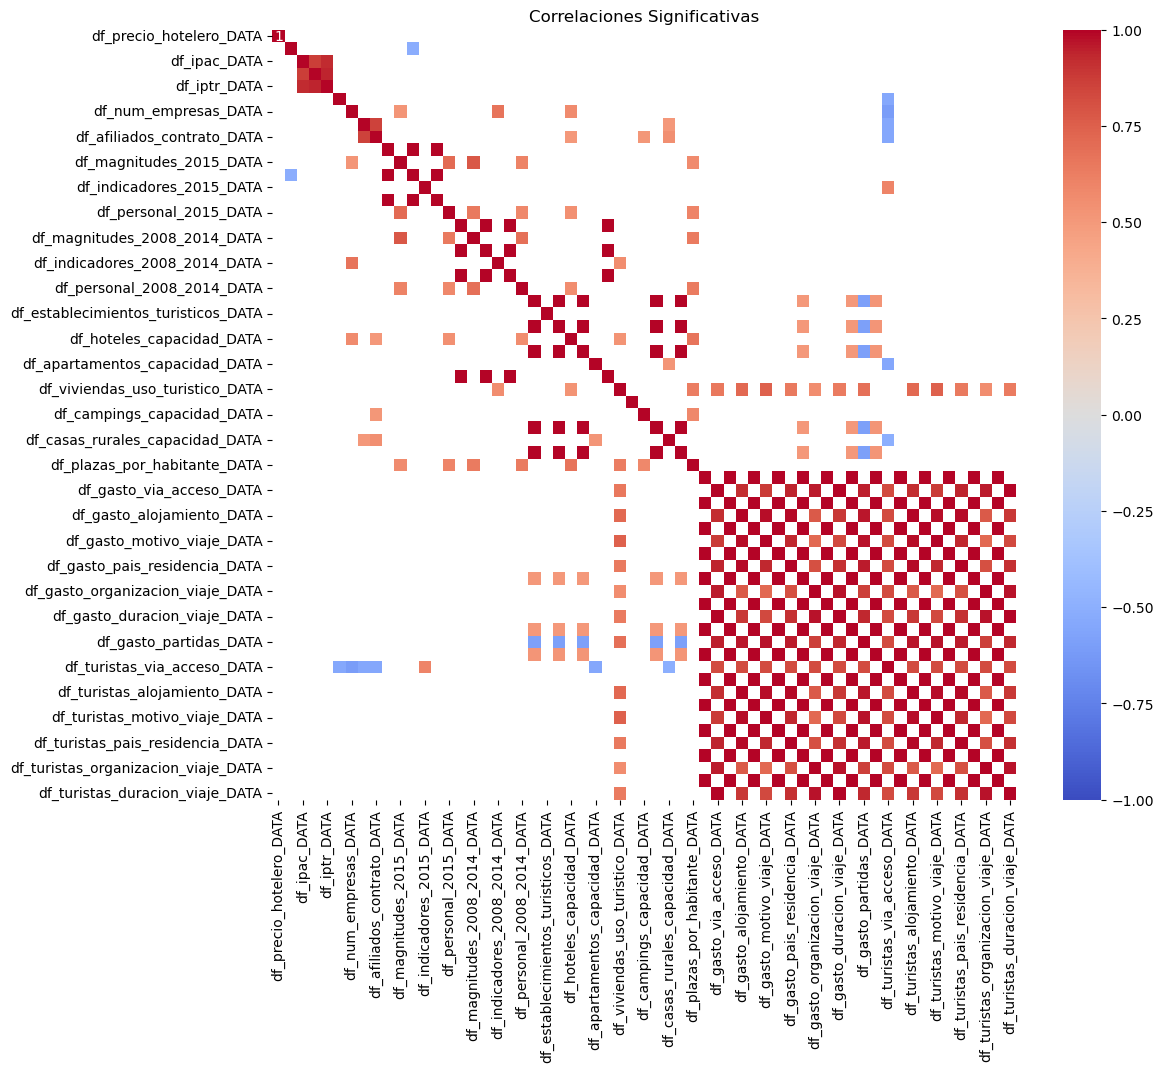

In [54]:
# Filtrar correlaciones significativas
significant_correlations = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]
plt.figure(figsize=(12, 10))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlaciones Significativas')
plt.show()


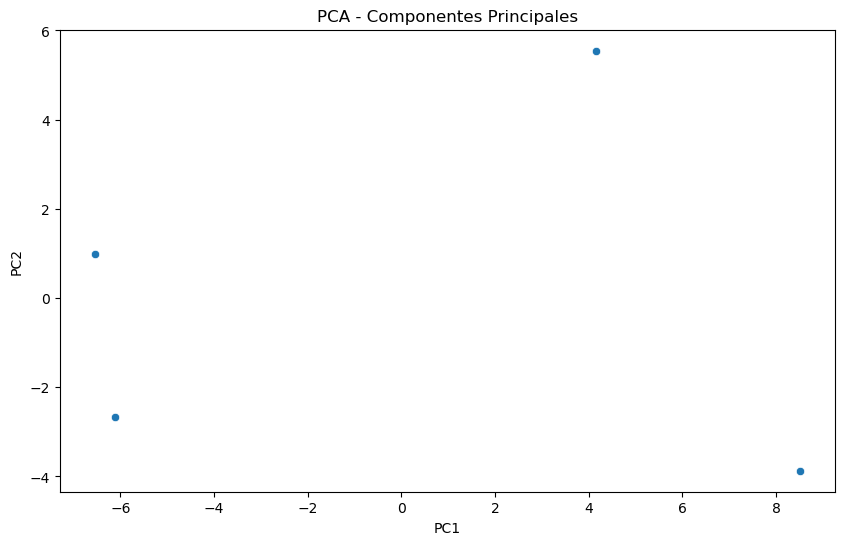

In [55]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df.dropna())

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Graficar los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC2'])
plt.title('PCA - Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [56]:
# Verificación de la cantidad de filas en ambos dataframes
print(f"Filas en combined_df: {len(combined_df)}")
print(f"Filas en scaled_data: {len(scaled_data)}")

# Si no coinciden, verifica las filas con valores nulos o inconsistentes
print("Filas con valores nulos en combined_df:")
print(combined_df.isnull().sum())

print("Filas con valores nulos en scaled_data:")
print(pd.DataFrame(scaled_data).isnull().sum())


Filas en combined_df: 67200
Filas en scaled_data: 4
Filas con valores nulos en combined_df:
df_precio_hotelero_DATA                   66579
df_adr_revpar_DATA                        65018
df_ipac_DATA                              67008
df_ipap_DATA                              66670
df_iptr_DATA                              66618
                                          ...  
df_turistas_pais_residencia_DATA          67040
df_turistas_organizacion_viaje_Periodo    67104
df_turistas_organizacion_viaje_DATA       67108
df_turistas_duracion_viaje_Periodo        67104
df_turistas_duracion_viaje_DATA           67104
Length: 61, dtype: int64
Filas con valores nulos en scaled_data:
0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


In [57]:
# Eliminar filas con valores nulos en combined_df
combined_df_cleaned = combined_df.dropna()

# Verificar la cantidad de filas después de eliminar nulos
print(f"Filas después de eliminar nulos: {len(combined_df_cleaned)}")

Filas después de eliminar nulos: 4


In [58]:
# Verificar cantidad de valores nulos en cada columna
print(combined_df.isnull().sum())

# Imputar valores nulos con la mediana para las columnas numéricas
combined_df_imputed = combined_df.fillna(combined_df.median(numeric_only=True))

# Verificar la cantidad de filas después de la imputación
print(f"Filas después de la imputación: {len(combined_df_imputed)}")
print(combined_df_imputed.isnull().sum())


df_precio_hotelero_DATA                   66579
df_adr_revpar_DATA                        65018
df_ipac_DATA                              67008
df_ipap_DATA                              66670
df_iptr_DATA                              66618
                                          ...  
df_turistas_pais_residencia_DATA          67040
df_turistas_organizacion_viaje_Periodo    67104
df_turistas_organizacion_viaje_DATA       67108
df_turistas_duracion_viaje_Periodo        67104
df_turistas_duracion_viaje_DATA           67104
Length: 61, dtype: int64
Filas después de la imputación: 67200
df_precio_hotelero_DATA                   0
df_adr_revpar_DATA                        0
df_ipac_DATA                              0
df_ipap_DATA                              0
df_iptr_DATA                              0
                                         ..
df_turistas_pais_residencia_DATA          0
df_turistas_organizacion_viaje_Periodo    0
df_turistas_organizacion_viaje_DATA       0
df_turistas_d

In [59]:
from sklearn.preprocessing import StandardScaler

# Selecciona solo las columnas numéricas para la normalización
numeric_columns = combined_df.select_dtypes(include=[float, int]).columns

# Inicializa el escalador
scaler = StandardScaler()

# Aplica el escalador a los datos
combined_df[numeric_columns] = scaler.fit_transform(combined_df[numeric_columns])

# Verificación rápida de los resultados
print(combined_df.head())


   df_precio_hotelero_DATA  df_adr_revpar_DATA  df_ipac_DATA  df_ipap_DATA  \
0                -0.654896            0.525305      1.130912      0.886691   
1                -0.306114            1.406519     -0.955963     -0.904469   
2                -0.916306            0.309215      1.033098           NaN   
3                 0.158223           -0.106542     -0.985288           NaN   
4                -1.960536            0.101336      0.413904           NaN   

   df_iptr_DATA  df_num_empresas_Periodo  df_num_empresas_DATA  \
0      1.006939                -1.828283              1.492211   
1     -1.003288                -1.565657              1.495113   
2      0.963447                -1.303030              1.515015   
3     -0.988295                -1.040404              1.507828   
4      0.996674                -0.777778              1.493178   

   df_afiliados_regimen_DATA  df_afiliados_contrato_DATA  \
0                   2.732117                    3.122097   
1             

In [60]:
# Verificar valores nulos en combined_df
nulos_combinados = combined_df.isnull().sum()
print(nulos_combinados[nulos_combinados > 0])

# Imputar valores nulos en combined_df usando la mediana
combined_df.fillna(combined_df.median(), inplace=True)

# Verificar nuevamente que no haya valores nulos
nulos_combinados = combined_df.isnull().sum()
print("Valores nulos restantes después de la imputación:", nulos_combinados[nulos_combinados > 0])


df_precio_hotelero_DATA                   66579
df_adr_revpar_DATA                        65018
df_ipac_DATA                              67008
df_ipap_DATA                              66670
df_iptr_DATA                              66618
df_num_empresas_Periodo                   67018
df_num_empresas_DATA                      67018
df_afiliados_regimen_DATA                 65976
df_afiliados_contrato_DATA                65996
df_magnitudes_2015_Periodo                66948
df_magnitudes_2015_DATA                   66948
df_indicadores_2015_Periodo               66822
df_indicadores_2015_DATA                  66822
df_personal_2015_Periodo                  67074
df_personal_2015_DATA                     67074
df_magnitudes_2008_2014_Periodo           66955
df_magnitudes_2008_2014_DATA              66955
df_indicadores_2008_2014_Periodo          67004
df_indicadores_2008_2014_DATA             67004
df_personal_2008_2014_Periodo             67053
df_personal_2008_2014_DATA              

Paso 3: Reducción de Dimensionalidad (PCA)

Variabilidad explicada por cada componente principal:
PC1: 0.36
PC2: 0.23


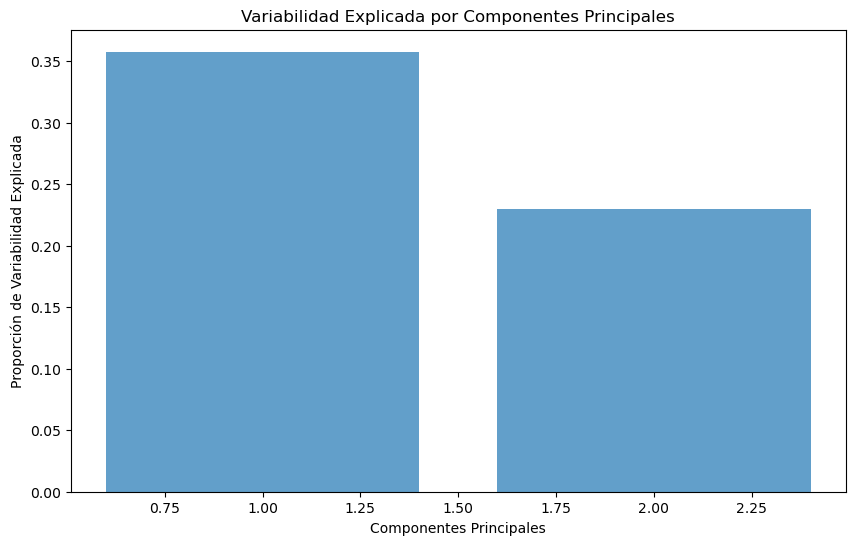

In [61]:
from sklearn.decomposition import PCA

# Filtrar las columnas numéricas
numeric_columns = combined_df.select_dtypes(include=[float, int]).columns

# Aplica PCA a los datos normalizados
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_df[numeric_columns])

# Crea un nuevo DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Verifica la variabilidad explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Variabilidad explicada por cada componente principal:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}")

# Gráfico de la variabilidad explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Variabilidad Explicada')
plt.title('Variabilidad Explicada por Componentes Principales')
plt.show()


Paso 4: Agrupamiento KMeans

/Users/patriciagonzalez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


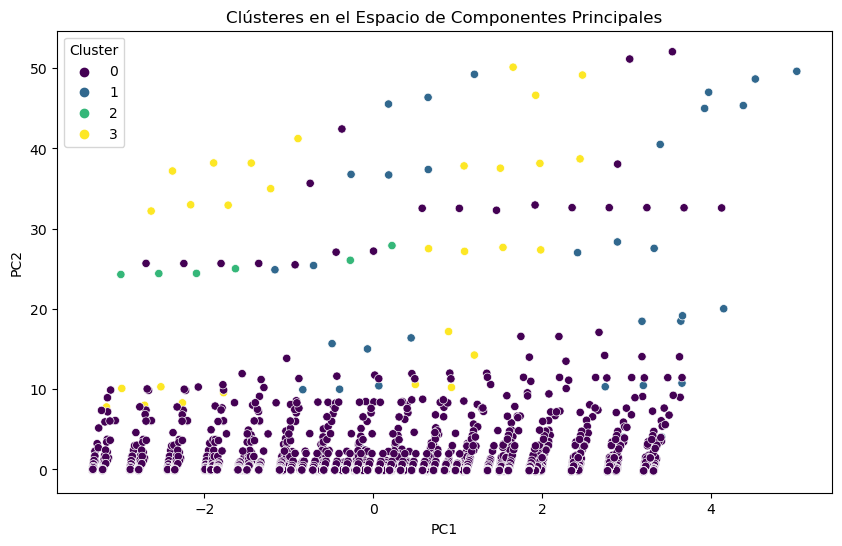

In [62]:
from sklearn.cluster import KMeans

# Escalar los datos antes de aplicar KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[numeric_columns])

# Determinar el número de clústeres
n_clusters = 4  # Puedes ajustar este valor según tus necesidades

# Aplicar KMeans
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(scaled_data)

# Añadir etiquetas de clúster a los datos PCA
pca_df['Cluster'] = clusters

# Visualiza los clústeres en el espacio de los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clústeres en el Espacio de Componentes Principales')
plt.show()


Paso 5: Descripción Estadística de los Clústeres

In [63]:
# Añadir etiquetas de clúster a los datos originales
combined_df['Cluster'] = clusters

# Descripción estadística de los clústeres
cluster_summary = combined_df.groupby('Cluster').describe()

print(cluster_summary)



        df_precio_hotelero_DATA                                          \
                          count      mean       std       min       25%   
Cluster                                                                   
0                       67125.0 -0.168858  0.094681 -2.710944 -0.170830   
1                          36.0 -0.523193  0.615987 -1.960536 -0.818541   
2                           6.0 -0.394308  0.376845 -0.916306 -0.610153   
3                          33.0 -0.541795  0.657287 -1.910509 -0.917715   

                                      df_adr_revpar_DATA            ...  \
              50%       75%       max              count      mean  ...   
Cluster                                                             ...   
0       -0.170830 -0.170830  4.944630            67125.0 -0.010544  ...   
1       -0.447389 -0.247632  0.880447               36.0 -0.111056  ...   
2       -0.391020 -0.204651  0.158223                6.0  0.127771  ...   
3       -0.521725 -0.117

In [64]:
combined_df.isnull().sum()

df_precio_hotelero_DATA                   0
df_adr_revpar_DATA                        0
df_ipac_DATA                              0
df_ipap_DATA                              0
df_iptr_DATA                              0
                                         ..
df_turistas_organizacion_viaje_Periodo    0
df_turistas_organizacion_viaje_DATA       0
df_turistas_duracion_viaje_Periodo        0
df_turistas_duracion_viaje_DATA           0
Cluster                                   0
Length: 62, dtype: int64

In [66]:
# # Exportar datos finales a CSV
# combined_df.to_csv('datos_finales.csv', index=False)
